<a href="https://colab.research.google.com/github/rajinipreethajohn/SP500/blob/main/FinSP500_EMA_Crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Import relevant libraries

#!pip install ipympl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [27]:
%matplotlib widget


In [28]:
#Reading the S&P csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ManoramaFin/Aleks_SP500.csv',parse_dates=['Date'], index_col = 'Date')
df.head(5)

,Open,Close,Return Close day vs Close previous day
Date,,,
"Jul 27, 2023","4,598.26","4,537.41",-0.64%
"Jul 26, 2023","4,558.96","4,566.75",-0.02%
"Jul 25, 2023","4,555.19","4,567.46",0.28%
"Jul 24, 2023","4,543.39","4,554.64",0.40%
"Jul 21, 2023","4,550.16","4,536.34",0.03%


In [29]:
#Checking datatypes, Count and Null
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2601 entries, Jul 27, 2023 to *Close price adjusted for splits.**Adjusted close price adjusted for splits and dividend and/or capital gain distributions.
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Open                                    2600 non-null   object
 1   Close                                   2600 non-null   object
 2   Return Close day vs Close previous day  2601 non-null   object
dtypes: object(3)
memory usage: 81.3+ KB


In [30]:
#Other relevant info
df.describe()

,Open,Close,Return Close day vs Close previous day
count,2600,2600,2601
unique,2580,2587,501
top,"2,819.72","2,268.90",0.28%
freq,2,2,24


In [31]:
#Convrerting the datatype of Close to a Float in order to plot
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df.dtypes

Open                                      float64
Close                                     float64
Return Close day vs Close previous day     object
dtype: object

In [32]:
df.rename(columns={'Return Close day vs Close previous day': 'Return'}, inplace=True)
df.head(5)

,Open,Close,Return
Date,,,
"Jul 27, 2023",4598.26,4537.41,-0.64%
"Jul 26, 2023",4558.96,4566.75,-0.02%
"Jul 25, 2023",4555.19,4567.46,0.28%
"Jul 24, 2023",4543.39,4554.64,0.40%
"Jul 21, 2023",4550.16,4536.34,0.03%


In [36]:
from google.colab import output
output.enable_custom_widget_manager()



<Axes: xlabel='Date'>

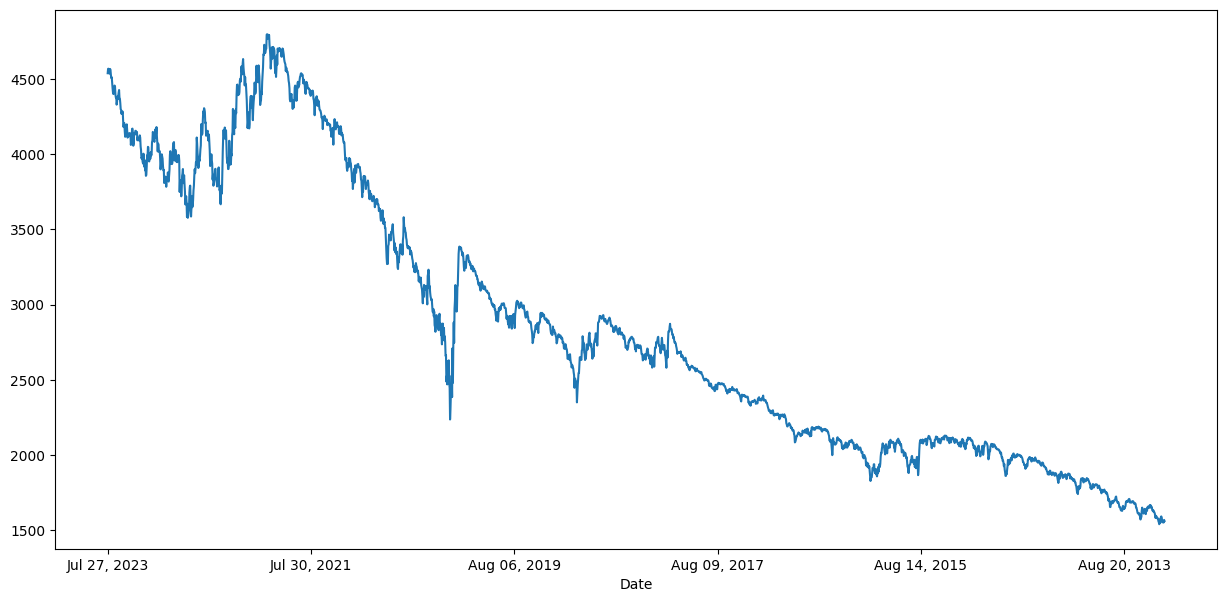

In [38]:
#Plotting the 'Close' column
df['Close'].plot(figsize= (15,7))


<Axes: title={'center': 'Rolling 50-day mean on close price'}, xlabel='Date'>

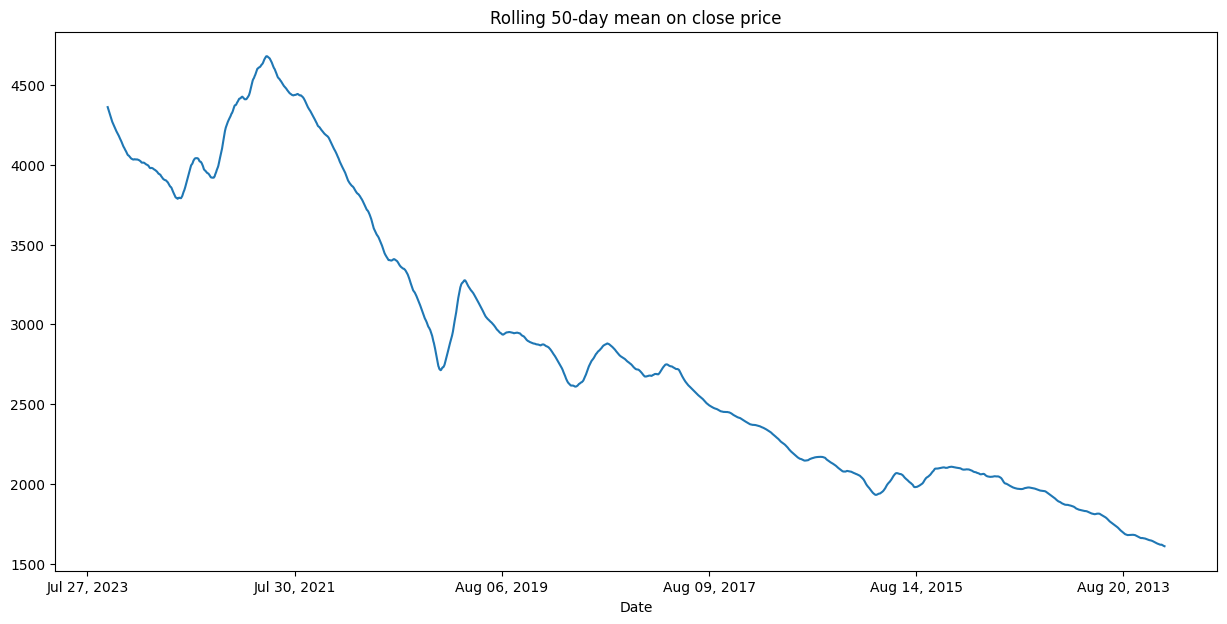

In [41]:
#Finding moving average for a window of 50 rows in the Close column
df['Close'].rolling(window=50).mean().plot(figsize= (15,7),label='Rolling 50-day Mean', title= 'Rolling 50-day mean on close price')

<Axes: title={'center': 'Rolling 200-day mean on close price'}, xlabel='Date'>

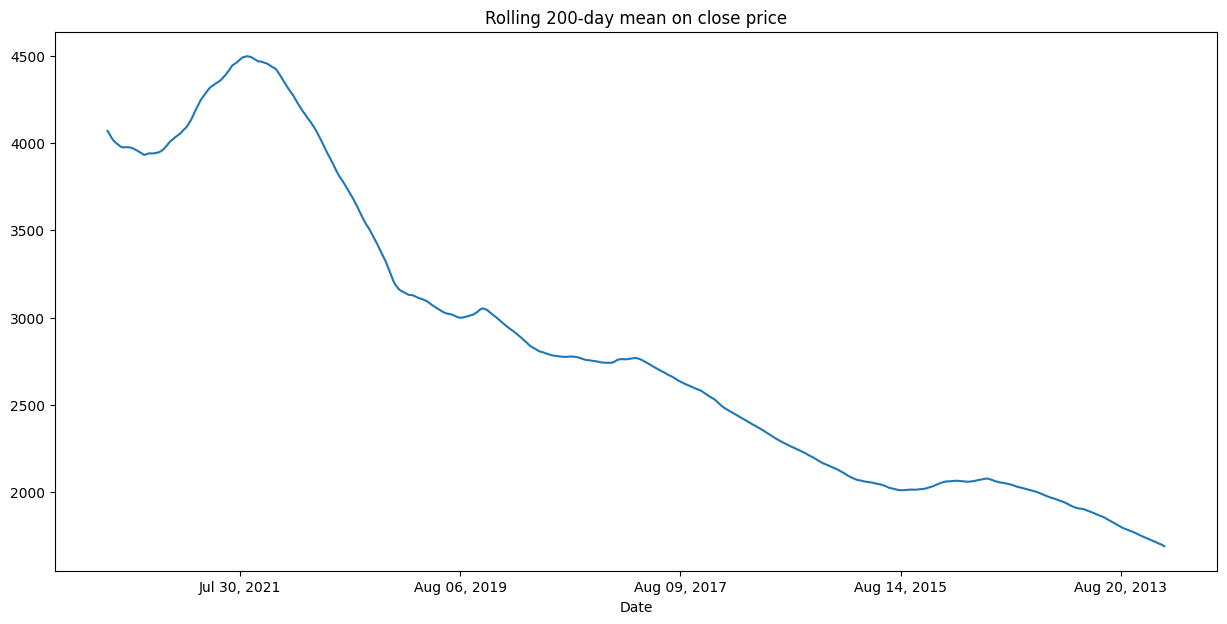

In [42]:
#Finding moving average for a window of 200 rows in the Close column
df['Close'].rolling(window=200).mean().plot(figsize= (15,7),label='Rolling 200-day Mean',title= 'Rolling 200-day mean on close price')

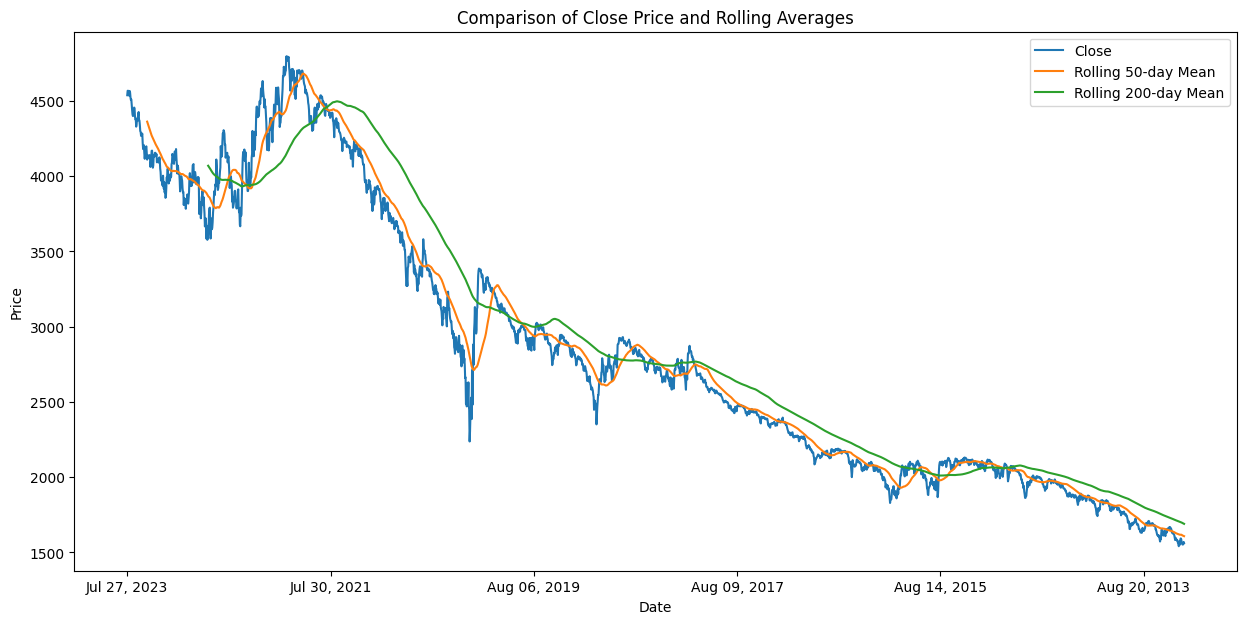

In [43]:
#Comaprison with all three plots in one
df['Close'].plot(figsize= (15,7))
df['Close'].rolling(window=50).mean().plot(figsize= (15,7),label='Rolling 50-day Mean')
df['Close'].rolling(window=200).mean().plot(figsize= (15,7),label='Rolling 200-day Mean')

# Add title, x-axis label, y-axis label, and legend
plt.title('Comparison of Close Price and Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Display the plot
plt.show()

In [44]:
#Let's calculate the exponential moving average on 50 days(short) and
#200 days (long) period on the Close price

df['ema_short'] = df['Close'].ewm(span=50, adjust=False).mean()
df['ema_long'] = df['Close'].ewm(span=200, adjust=False).mean()

df.head(5)

,Open,Close,Return,ema_short,ema_long
Date,,,,,
"Jul 27, 2023",4598.26,4537.41,-0.64%,4537.410000,4537.410000
"Jul 26, 2023",4558.96,4566.75,-0.02%,4538.560588,4537.701940
"Jul 25, 2023",4555.19,4567.46,0.28%,4539.693899,4537.998040
"Jul 24, 2023",4543.39,4554.64,0.40%,4540.280020,4538.163632
"Jul 21, 2023",4550.16,4536.34,0.03%,4540.125510,4538.145486


import numpy as np
from google.colab import autoviz
df_1635148478086841916 = autoviz.get_df('df_1635148478086841916')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1635148478086841916, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz
df_106602503939120288 = autoviz.get_df('df_106602503939120288')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_106602503939120288, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3824693988028591960 = autoviz.get_df('df_3824693988028591960')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3824693988028591960, *['ema_short'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5728274774687262049 = autoviz.get_df('df_5728274774687262049')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5728274774687262049, *['ema_long'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2733988472822713338 = autoviz.get_df('df_2733988472822713338')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2733988472822713338, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9204464244160753756 = autoviz.get_df('df_9204464244160753756')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9204464244160753756, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1867836175190987659 = autoviz.get_df('df_1867836175190987659')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1867836175190987659, *['ema_short'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3742110347640893385 = autoviz.get_df('df_3742110347640893385')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3742110347640893385, *['ema_long'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4370953198240352836 = autoviz.get_df('df_4370953198240352836')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4370953198240352836, *['Return'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4438773634813271769 = autoviz.get_df('df_4438773634813271769')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4438773634813271769, *[[['Open', 'Close'], ['Close', 'ema_short'], ['ema_short', 'ema_long']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5382254567541982672 = autoviz.get_df('df_5382254567541982672')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5382254567541982672, *['Open', 'Return'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_298275961578564598 = autoviz.get_df('df_298275961578564598')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_298275961578564598, *['Close', 'Return'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8568079888907620557 = autoviz.get_df('df_8568079888907620557')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8568079888907620557, *['ema_short', 'Return'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4680965312127515154 = autoviz.get_df('df_4680965312127515154')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4680965312127515154, *['ema_long', 'Return'], **{'inner': 'stick'})
chart

In [45]:
df['Bullish'] = 0.0
df['Bullish'] = np.where(df['ema_short'] > df['ema_long'], 1.0, 0.0)
df['Crossover'] = df['Bullish'].diff()

df


,Open,Close,Return,ema_short,ema_long,Bullish,Crossover
Date,,,,,,,
"Jul 27, 2023",4598.26,4537.41,-0.64%,4537.410000,4537.410000,0.0,NaN
"Jul 26, 2023",4558.96,4566.75,-0.02%,4538.560588,4537.701940,1.0,1.0
"Jul 25, 2023",4555.19,4567.46,0.28%,4539.693899,4537.998040,1.0,0.0
"Jul 24, 2023",4543.39,4554.64,0.40%,4540.280020,4538.163632,1.0,0.0
"Jul 21, 2023",4550.16,4536.34,0.03%,4540.125510,4538.145486,1.0,0.0
...,...,...,...,...,...,...,...
"Apr 04, 2013",1553.69,1559.98,0.40%,1602.874124,1689.475189,0.0,0.0
"Apr 03, 2013",1570.25,1553.69,-1.05%,1600.945335,1688.124093,0.0,0.0
"Apr 02, 2013",1562.17,1570.25,0.52%,1599.741596,1686.951216,0.0,0.0


import numpy as np
from google.colab import autoviz
df_8172380865992865357 = autoviz.get_df('df_8172380865992865357')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8172380865992865357, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6196318357768663380 = autoviz.get_df('df_6196318357768663380')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6196318357768663380, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1186327269182258897 = autoviz.get_df('df_1186327269182258897')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1186327269182258897, *['ema_short'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4737016742907850826 = autoviz.get_df('df_4737016742907850826')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4737016742907850826, *['ema_long'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4526407431010186164 = autoviz.get_df('df_4526407431010186164')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4526407431010186164, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2195608589485596777 = autoviz.get_df('df_2195608589485596777')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2195608589485596777, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7327773053011069719 = autoviz.get_df('df_7327773053011069719')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7327773053011069719, *['ema_short'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7199385613136230776 = autoviz.get_df('df_7199385613136230776')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7199385613136230776, *['ema_long'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4403231022960518205 = autoviz.get_df('df_4403231022960518205')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4403231022960518205, *[[['Open', 'Close'], ['Close', 'ema_short'], ['ema_short', 'ema_long'], ['ema_long', 'Bullish']]], **{})
chart

Text(0.5, 1.0, 'EMA Crossover')

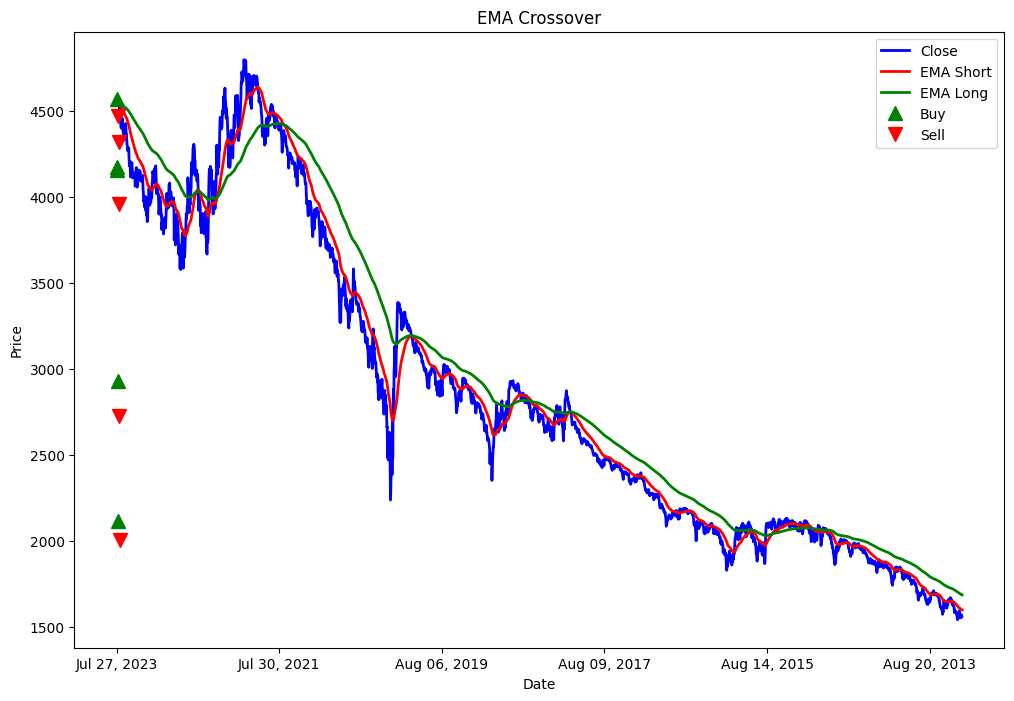

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111, ylabel = 'Price')

df['Close'].plot(ax=ax1, color='b', lw= 2. )
df['ema_short'].plot(ax=ax1, color='r', lw= 2. )
df['ema_long'].plot(ax=ax1, color='g', lw= 2. )

ax1.plot(df.loc[df.Crossover == 1.0].index,
         df.Close[df.Crossover == 1.0],
         '^',markersize = 10, color ='g')
ax1.plot(df.loc[df.Crossover == -1.0].index,
         df.Close[df.Crossover == -1.0],
         'v',markersize = 10, color ='r')
plt.legend(['Close', 'EMA Short', 'EMA Long', 'Buy', 'Sell'])
plt.title('EMA Crossover')